**Gated Recurrent Units**

**Problem Statement:** Predicting spice crop yield from different parameters. The end result is a model that predicts yield for spice crops such as black pepper,dry ginger and turmeric.

In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from keras.optimizers import adam_v2
from keras.layers import Dense, BatchNormalization, Dropout, LSTM,GRU
from keras.optimizers import adam_v2
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pre
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def mean_absolute_percentage_error(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))

## BLACK PEPPER

In [ ]:
# importing data
data_bp = pd.read_csv('/content/black pepper 2008-2020.csv')
data_bp.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,Alappuzha,2008,2028,256,1451.29,24.29,33.01,29.5,0.184,8.29,6.6,0.13
1,Alappuzha,2009,1943,242,1443.29,24.29,35.93,31.0,0.106,8.52,6.2,0.12
2,Alappuzha,2010,2134,297,1610.32,24.29,39.81,33.0,0.330,7.88,6.0,0.14
3,Alappuzha,2011,1940,174,1529.31,23.31,37.87,31.5,0.112,7.89,5.9,0.09
4,Alappuzha,2012,1997,167,1613.32,25.26,36.90,32.0,0.106,8.19,6.0,0.08


In [ ]:
data_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                169 non-null    object 
 1   YEAR                    169 non-null    int64  
 2   AREA                    169 non-null    int64  
 3   PRODUCTION              169 non-null    int64  
 4   AVERAGE RAINFALL        169 non-null    float64
 5   MINIMUM TEMPERATURE     169 non-null    float64
 6   MAXIMUM TEMPERATURE     169 non-null    float64
 7   AVERAGE TEMPERATURE     169 non-null    float64
 8   RELATIVE SOIL MOISTURE  169 non-null    float64
 9   AVERAGE WINDSPEED       169 non-null    float64
 10  pH                      169 non-null    float64
 11  YIELD                   169 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 16.0+ KB


In [ ]:
data_bp["YEAR"]=data_bp["YEAR"].astype("float64")
data_bp["AREA"]=data_bp["AREA"].astype("float64")
data_bp["PRODUCTION"]=data_bp["PRODUCTION"].astype("float64")

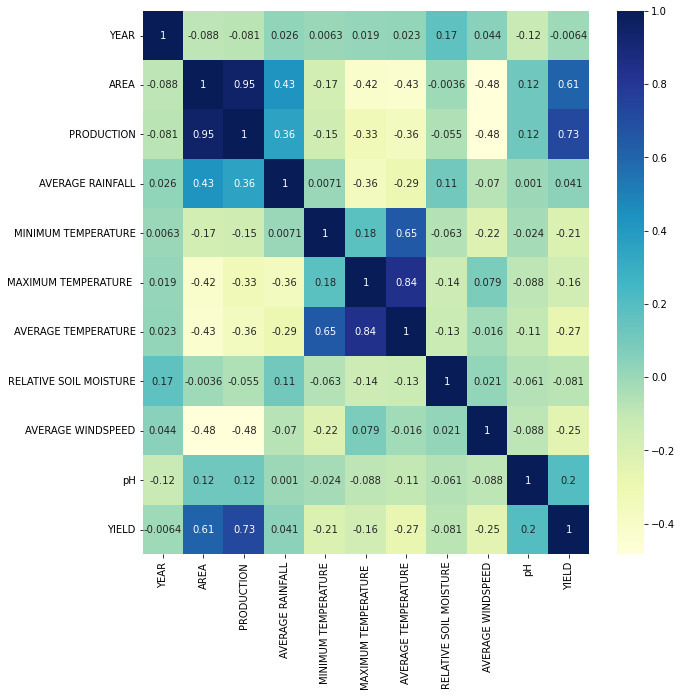

In [ ]:
num_df_bp=data_bp.select_dtypes(include=[float,int])
sns.heatmap(num_df_bp.corr(), cmap="YlGnBu", annot=True)
plt.rcParams["figure.figsize"] = [10,10]

In [ ]:
le=pre.LabelEncoder()
cat_df_bp=data_bp.select_dtypes(exclude=[float,int])
for x in cat_df_bp.columns:
    data_bp[x]=le.fit_transform(data_bp[x])
X=data_bp.drop(['YIELD'], axis=1)
Y=data_bp["YIELD"]
X

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH
0,0,2008.0,2028.0,256.0,1451.29,24.29,33.01,29.5,0.184,8.29,6.6
1,0,2009.0,1943.0,242.0,1443.29,24.29,35.93,31.0,0.106,8.52,6.2
2,0,2010.0,2134.0,297.0,1610.32,24.29,39.81,33.0,0.330,7.88,6.0
3,0,2011.0,1940.0,174.0,1529.31,23.31,37.87,31.5,0.112,7.89,5.9
4,0,2012.0,1997.0,167.0,1613.32,25.26,36.90,32.0,0.106,8.19,6.0
...,...,...,...,...,...,...,...,...,...,...,...
164,12,2016.0,25542.0,4060.0,1939.39,19.43,29.13,25.0,0.436,7.67,6.2
165,12,2017.0,20825.0,4526.0,1880.38,19.43,32.04,26.5,0.429,9.51,6.4
166,12,2018.0,16571.0,4497.0,1844.37,15.54,32.04,24.5,0.422,9.79,5.5
167,12,2019.0,16189.0,2431.0,1972.39,15.54,32.04,24.5,0.217,9.01,5.4


In [ ]:
df_list = data_bp.columns

In [ ]:
sc = MinMaxScaler()
data_bp[df_list] = sc.fit_transform(data_bp[df_list])
data_bp

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0.0,0.000000,0.015055,0.002503,0.384945,0.750429,0.399725,0.541667,0.228070,0.461735,1.000000,0.092593
1,0.0,0.083333,0.014073,0.002233,0.380645,0.750429,0.600275,0.666667,0.000000,0.491071,0.666667,0.074074
2,0.0,0.166667,0.016280,0.003292,0.470428,0.750429,0.866758,0.833333,0.654971,0.409439,0.500000,0.111111
3,0.0,0.250000,0.014038,0.000924,0.426883,0.666381,0.733516,0.708333,0.017544,0.410714,0.416667,0.018519
4,0.0,0.333333,0.014697,0.000789,0.472041,0.833619,0.666896,0.750000,0.000000,0.448980,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
164,1.0,0.666667,0.286739,0.075746,0.647312,0.333619,0.133242,0.166667,0.964912,0.382653,0.666667,0.148148
165,1.0,0.750000,0.232238,0.084718,0.615593,0.333619,0.333104,0.291667,0.944444,0.617347,0.833333,0.259259
166,1.0,0.833333,0.183087,0.084160,0.596236,0.000000,0.333104,0.125000,0.923977,0.653061,0.083333,0.351852
167,1.0,0.916667,0.178673,0.044381,0.665051,0.000000,0.333104,0.125000,0.324561,0.553571,0.000000,0.129630


In [ ]:
X=data_bp.drop(['YIELD'], axis=1)
Y=data_bp["YIELD"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=12345)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(118, 1, 11) (118,) (51, 1, 11) (51,)


Defining a model

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500,return_sequences=False))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1,activation = 'sigmoid'))
# Compiling the GRU
regressorGRU.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.summary()
history=regressorGRU.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=150,shuffle=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 1, 500)            769500    
                                                                 
 dropout_4 (Dropout)         (None, 1, 500)            0         
                                                                 
 gru_5 (GRU)                 (None, 1, 500)            1503000   
                                                                 
 dropout_5 (Dropout)         (None, 1, 500)            0         
                                                                 
 gru_6 (GRU)                 (None, 1, 500)            1503000   
                                                                 
 dropout_6 (Dropout)         (None, 1, 500)            0         
                                                                 
 gru_7 (GRU)                 (None, 500)              

## MODEL EVALUATION

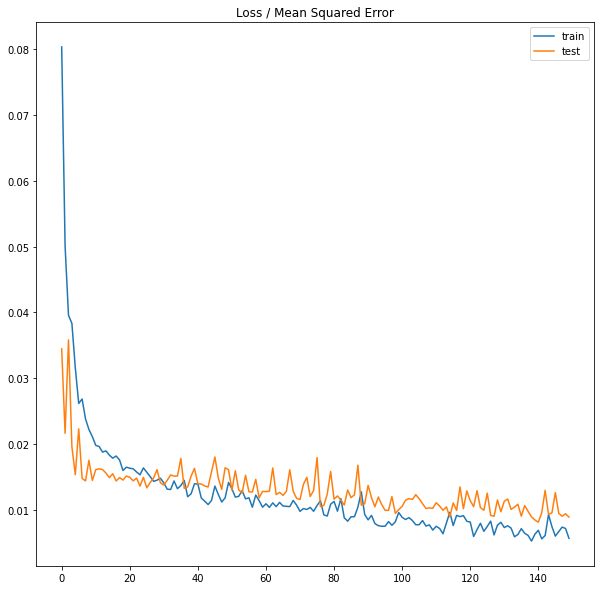

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend()
plt.show()

In [ ]:
# make predictions
trainPredict = regressorGRU.predict(X_train)
testPredict = regressorGRU.predict(X_test)

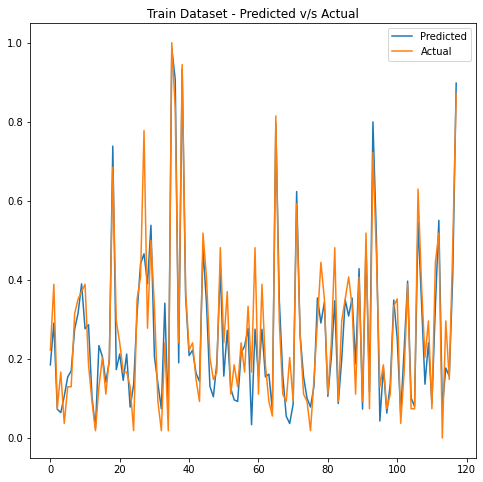

In [ ]:
plt.title('Train Dataset - Predicted v/s Actual')
plt.plot(trainPredict , label='Predicted')
plt.plot(y_train, label='Actual')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend()
plt.show()

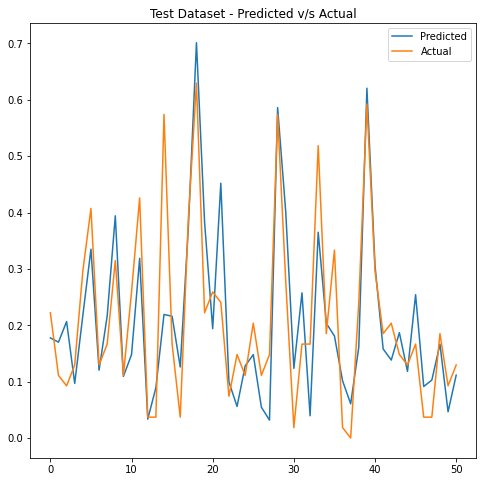

In [ ]:
plt.title('Test Dataset - Predicted v/s Actual')
plt.plot(testPredict , label='Predicted')
plt.plot(y_test, label='Actual')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend()
plt.show()

In [ ]:
#Mean Absolute Error
mae_train = mean_absolute_error(y_train, trainPredict)
mae_test = mean_absolute_error(y_test, testPredict)
print('MAE Train: %.3f'% (mae_train))
print('MAE Test: %.3f'% (mae_test))
#Root Mean Squared Error
rmse_train = mean_squared_error(y_train, trainPredict, squared=False)
rmse_test = mean_squared_error(y_test, testPredict, squared=False)
print('RMSE Train: %.3f'% (rmse_train))
print('RMSE Test: %.3f'% (rmse_test))
#Mean Absolute Percentage Error
mp_train = mean_absolute_percentage_error(trainPredict,y_train)
mp_test = mean_absolute_percentage_error(testPredict,y_test)
print('MAPE Train: %.3f'% (mp_train))
print('MAPE Test: %.3f'% (mp_test))

MAE Train: 0.054
MAE Test: 0.072
RMSE Train: 0.071
RMSE Test: 0.094
MAPE Train: 1.362
MAPE Test: 1.231


## DRY GINGER

In [ ]:
# importing data
data_dg = pd.read_csv('/content/dry ginger 2008-2020.csv')
data_dg.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,Alappuzha,2008,161,353,1490.74,24.95,33.98,31.14,0.39,8.29,6.27,2.19
1,Alappuzha,2009,66,163,1482.52,24.95,36.98,32.73,0.38,8.52,6.07,2.47
2,Alappuzha,2010,87,264,1654.09,24.95,40.97,34.84,0.47,7.88,5.62,3.02
3,Alappuzha,2011,94,172,1570.87,23.95,38.98,33.25,0.42,7.89,5.56,1.83
4,Alappuzha,2012,125,220,1657.17,25.94,37.98,33.78,0.42,8.19,6.04,1.76


In [ ]:
data_dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                181 non-null    object 
 1   YEAR                    181 non-null    int64  
 2   AREA                    181 non-null    int64  
 3   PRODUCTION              181 non-null    int64  
 4   AVERAGE RAINFALL        181 non-null    float64
 5   MINIMUM TEMPERATURE     181 non-null    float64
 6   MAXIMUM TEMPERATURE     181 non-null    float64
 7   AVERAGE TEMPERATURE     181 non-null    float64
 8   RELATIVE SOIL MOISTURE  181 non-null    float64
 9   AVERAGE WINDSPEED       181 non-null    float64
 10  pH                      181 non-null    float64
 11  YIELD                   181 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 17.1+ KB


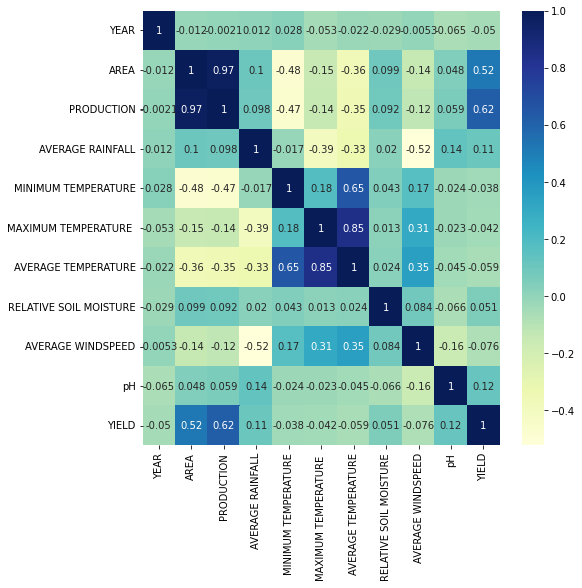

In [ ]:
num_df_dg=data_dg.select_dtypes(include=[float,int])
sns.heatmap(num_df_dg.corr(), cmap="YlGnBu", annot=True)
plt.rcParams["figure.figsize"] = [20,20]

In [ ]:
le=pre.LabelEncoder()
cat_df_dg=data_dg.select_dtypes(exclude=[float,int])
for x in cat_df_dg.columns:
    data_dg[x]=le.fit_transform(data_dg[x])


In [ ]:
df_list = data_dg.columns

In [ ]:
sc = MinMaxScaler()
data_dg[df_list] = sc.fit_transform(data_dg[df_list])
data_dg

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0.000000,0.000000,0.019857,0.007559,0.384947,0.750209,0.400267,0.541436,0.619048,0.461735,0.72,0.109817
1,0.000000,0.083333,0.006757,0.002657,0.380645,0.750209,0.600400,0.666930,0.571429,0.491071,0.52,0.156406
2,0.000000,0.166667,0.009653,0.005263,0.470428,0.750209,0.866578,0.833465,1.000000,0.409439,0.07,0.247920
3,0.000000,0.250000,0.010618,0.002889,0.426879,0.666667,0.733823,0.707972,0.761905,0.410714,0.01,0.049917
4,0.000000,0.333333,0.014892,0.004128,0.472040,0.832916,0.667111,0.749803,0.761905,0.448980,0.49,0.038270
...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.307692,0.750000,0.000689,0.000439,0.020969,0.666667,0.600400,0.625099,0.714286,0.608418,0.00,0.327787
177,0.307692,0.833333,0.003999,0.003147,0.051613,0.750209,0.799867,0.791634,0.095238,0.698980,0.96,0.404326
178,0.307692,0.916667,0.016823,0.009906,0.062901,0.499582,0.600400,0.541436,0.571429,0.661990,0.92,0.276206
179,0.307692,1.000000,0.011997,0.007223,0.066664,0.583124,0.600400,0.583268,0.714286,0.656888,0.60,0.289517


In [ ]:
X=data_dg.drop(['YIELD'], axis=1)
Y=data_dg["YIELD"]
X

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH
0,0.000000,0.000000,0.019857,0.007559,0.384947,0.750209,0.400267,0.541436,0.619048,0.461735,0.72
1,0.000000,0.083333,0.006757,0.002657,0.380645,0.750209,0.600400,0.666930,0.571429,0.491071,0.52
2,0.000000,0.166667,0.009653,0.005263,0.470428,0.750209,0.866578,0.833465,1.000000,0.409439,0.07
3,0.000000,0.250000,0.010618,0.002889,0.426879,0.666667,0.733823,0.707972,0.761905,0.410714,0.01
4,0.000000,0.333333,0.014892,0.004128,0.472040,0.832916,0.667111,0.749803,0.761905,0.448980,0.49
...,...,...,...,...,...,...,...,...,...,...,...
176,0.307692,0.750000,0.000689,0.000439,0.020969,0.666667,0.600400,0.625099,0.714286,0.608418,0.00
177,0.307692,0.833333,0.003999,0.003147,0.051613,0.750209,0.799867,0.791634,0.095238,0.698980,0.96
178,0.307692,0.916667,0.016823,0.009906,0.062901,0.499582,0.600400,0.541436,0.571429,0.661990,0.92
179,0.307692,1.000000,0.011997,0.007223,0.066664,0.583124,0.600400,0.583268,0.714286,0.656888,0.60


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=12345)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(126, 1, 11) (126,) (55, 1, 11) (55,)


Defining a model

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500,return_sequences=False))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1,activation = 'sigmoid'))
# Compiling the GRU
regressorGRU.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.summary()
history=regressorGRU.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=150,shuffle=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 1, 500)            769500    
                                                                 
 dropout_12 (Dropout)        (None, 1, 500)            0         
                                                                 
 gru_13 (GRU)                (None, 1, 500)            1503000   
                                                                 
 dropout_13 (Dropout)        (None, 1, 500)            0         
                                                                 
 gru_14 (GRU)                (None, 1, 500)            1503000   
                                                                 
 dropout_14 (Dropout)        (None, 1, 500)            0         
                                                                 
 gru_15 (GRU)                (None, 500)              

## MODEL EVALUATION

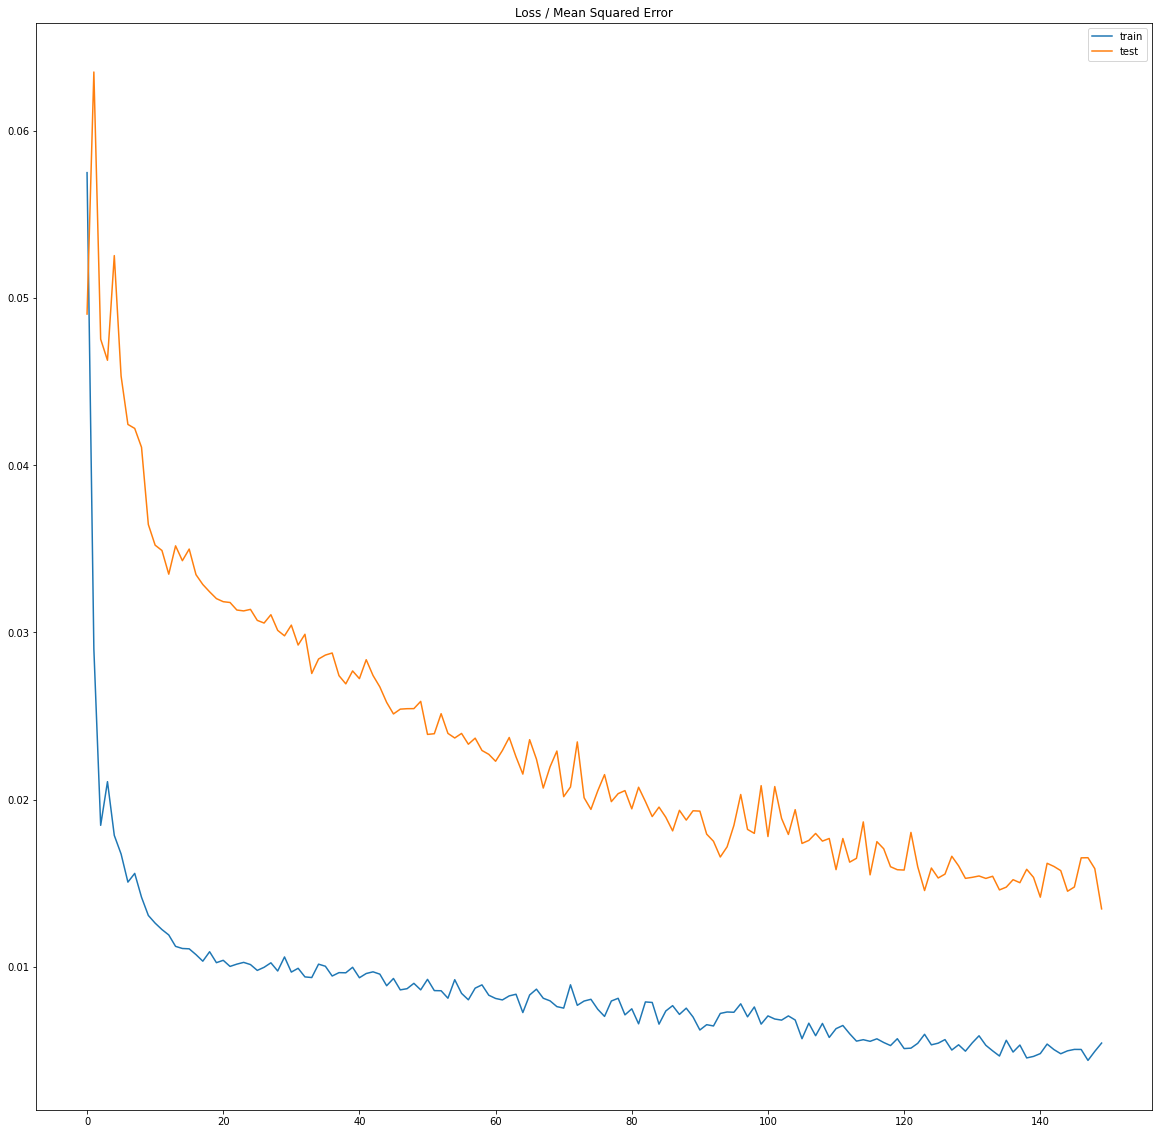

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.rcParams["figure.figsize"] = [5,5]
plt.legend()
plt.show()

In [ ]:
# make predictions
trainPredict = regressorGRU.predict(X_train)
testPredict = regressorGRU.predict(X_test)

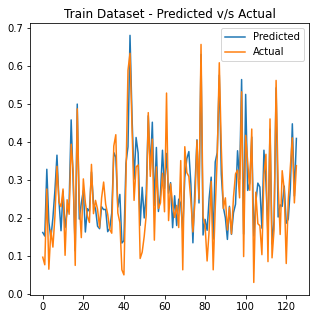

In [ ]:
plt.title('Train Dataset - Predicted v/s Actual')
plt.plot(trainPredict , label='Predicted')
plt.plot(y_train, label='Actual')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend()
plt.show()

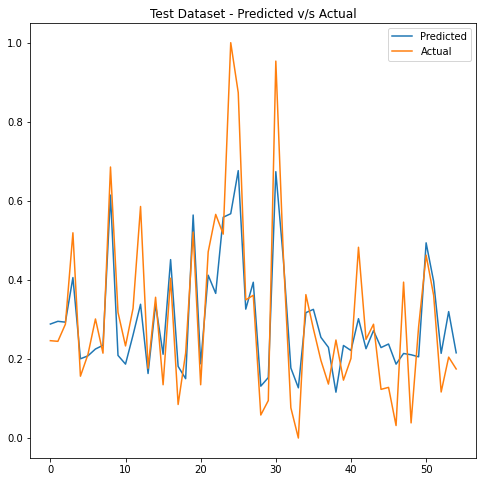

In [ ]:
plt.title('Test Dataset - Predicted v/s Actual')
plt.plot(testPredict , label='Predicted')
plt.plot(y_test, label='Actual')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend()
plt.show()

In [ ]:
#Mean Absolute Error
mae_train = mean_absolute_error(y_train, trainPredict)
mae_test = mean_absolute_error(y_test, testPredict)
print('MAE Train: %.3f'% (mae_train))
print('MAE Test: %.3f'% (mae_test))
#Root Mean Squared Error
rmse_train = mean_squared_error(y_train, trainPredict, squared=False)
rmse_test = mean_squared_error(y_test, testPredict, squared=False)
print('RMSE Train: %.3f'% (rmse_train))
print('RMSE Test: %.3f'% (rmse_test))
#Mean Absolute Percentage Error
mp_train = mean_absolute_percentage_error(trainPredict,y_train)
mp_test = mean_absolute_percentage_error(testPredict,y_test)
print('MAPE Train: %.3f'% (mp_train))
print('MAPE Test: %.3f'% (mp_test))

MAE Train: 0.052
MAE Test: 0.087
RMSE Train: 0.063
RMSE Test: 0.116
MAPE Train: 0.516
MAPE Test: 0.733


# TURMERIC

In [ ]:
# importing data
data_tc = pd.read_csv('/content/turmeric 2008-2020.csv')
data_tc.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,Alappuzha,2008,11,13,1473.06,24.65,33.51,30.53,0.22,8.29,6.28,1.18
1,Alappuzha,2009,20,21,1464.94,24.65,36.47,32.09,0.30,8.52,4.89,1.05
2,Alappuzha,2010,15,20,1634.48,24.65,40.41,34.16,0.36,7.88,5.38,1.33
3,Alappuzha,2011,12,21,1552.25,23.66,38.44,32.60,0.33,7.89,5.46,1.75
4,Alappuzha,2012,11,12,1637.52,25.64,37.45,33.12,0.32,8.19,5.64,1.09


In [ ]:
data_tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                181 non-null    object 
 1   YEAR                    181 non-null    int64  
 2   AREA                    181 non-null    int64  
 3   PRODUCTION              181 non-null    int64  
 4   AVERAGE RAINFALL        181 non-null    float64
 5   MINIMUM TEMPERATURE     181 non-null    float64
 6   MAXIMUM TEMPERATURE     181 non-null    float64
 7   AVERAGE TEMPERATURE     181 non-null    float64
 8   RELATIVE SOIL MOISTURE  181 non-null    float64
 9   AVERAGE WINDSPEED       181 non-null    float64
 10  pH                      181 non-null    float64
 11  YIELD                   181 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 17.1+ KB


In [ ]:
data_tc["DISTRICT"]=data_tc["DISTRICT"].astype("object")

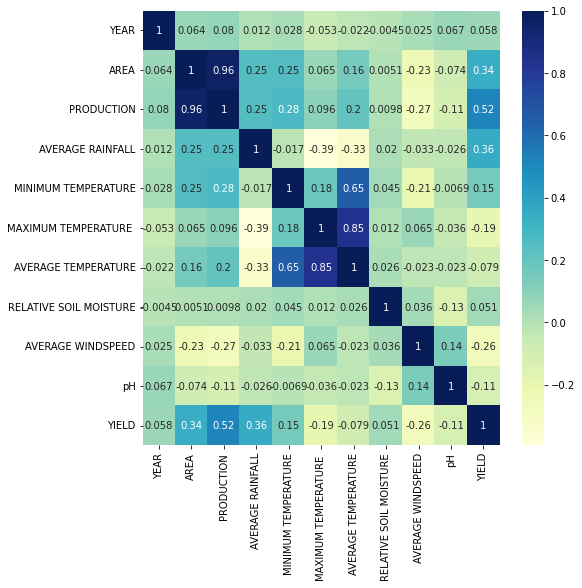

In [ ]:
num_df_tc=data_tc.select_dtypes(include=[float,int])
sns.heatmap(num_df_tc.corr(), cmap="YlGnBu", annot=True)
plt.rcParams["figure.figsize"] = [10,10]

In [ ]:
le=pre.LabelEncoder()
cat_df_tc=data_tc.select_dtypes(exclude=[float,int])
for x in cat_df_tc.columns:
    data_tc[x]=le.fit_transform(data_tc[x])
X=data_tc.drop(['YIELD'], axis=1)
Y=data_tc["YIELD"]

In [ ]:
df_list = data_tc.columns

In [ ]:
sc = MinMaxScaler()
data_tc[df_list] = sc.fit_transform(data_tc[df_list])
data_tc

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0.000000,0.000000,0.003148,0.002083,0.384948,0.749789,0.399865,0.541063,0.1250,0.461735,0.515254,0.106007
1,0.000000,0.083333,0.012592,0.004859,0.380648,0.749789,0.600135,0.666667,0.6250,0.491071,0.044068,0.060071
2,0.000000,0.166667,0.007345,0.004512,0.470433,0.749789,0.866712,0.833333,1.0000,0.409439,0.210169,0.159011
3,0.000000,0.250000,0.004197,0.004859,0.426886,0.666103,0.733424,0.707729,0.8125,0.410714,0.237288,0.307420
4,0.000000,0.333333,0.003148,0.001736,0.472043,0.833474,0.666441,0.749597,0.7500,0.448980,0.298305,0.074205
...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.307692,0.583333,0.069255,0.048941,0.000000,0.749789,0.533153,0.624799,0.6250,0.589286,0.366102,0.395760
177,0.307692,0.750000,0.082896,0.062131,0.020971,0.666103,0.600135,0.624799,0.7500,0.608418,0.481356,0.445230
178,0.307692,0.833333,0.012592,0.014578,0.051613,0.749789,0.799729,0.791465,0.1250,0.480867,0.325424,0.547703
179,0.307692,0.916667,0.032529,0.020826,0.062904,0.499577,0.600135,0.541063,0.5625,0.336735,0.105085,0.296820


In [ ]:
X=data_tc.drop(['YIELD'], axis=1)
Y=data_tc["YIELD"]
X

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH
0,0.000000,0.000000,0.003148,0.002083,0.384948,0.749789,0.399865,0.541063,0.1250,0.461735,0.515254
1,0.000000,0.083333,0.012592,0.004859,0.380648,0.749789,0.600135,0.666667,0.6250,0.491071,0.044068
2,0.000000,0.166667,0.007345,0.004512,0.470433,0.749789,0.866712,0.833333,1.0000,0.409439,0.210169
3,0.000000,0.250000,0.004197,0.004859,0.426886,0.666103,0.733424,0.707729,0.8125,0.410714,0.237288
4,0.000000,0.333333,0.003148,0.001736,0.472043,0.833474,0.666441,0.749597,0.7500,0.448980,0.298305
...,...,...,...,...,...,...,...,...,...,...,...
176,0.307692,0.583333,0.069255,0.048941,0.000000,0.749789,0.533153,0.624799,0.6250,0.589286,0.366102
177,0.307692,0.750000,0.082896,0.062131,0.020971,0.666103,0.600135,0.624799,0.7500,0.608418,0.481356
178,0.307692,0.833333,0.012592,0.014578,0.051613,0.749789,0.799729,0.791465,0.1250,0.480867,0.325424
179,0.307692,0.916667,0.032529,0.020826,0.062904,0.499577,0.600135,0.541063,0.5625,0.336735,0.105085


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=12345)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(126, 1, 11) (126,) (55, 1, 11) (55,)


Defining a model

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500,return_sequences=False))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1,activation = 'sigmoid'))
# Compiling the GRU
regressorGRU.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.summary()
history=regressorGRU.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=150,shuffle=False)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_16 (GRU)                (None, 1, 500)            769500    
                                                                 
 dropout_16 (Dropout)        (None, 1, 500)            0         
                                                                 
 gru_17 (GRU)                (None, 1, 500)            1503000   
                                                                 
 dropout_17 (Dropout)        (None, 1, 500)            0         
                                                                 
 gru_18 (GRU)                (None, 1, 500)            1503000   
                                                                 
 dropout_18 (Dropout)        (None, 1, 500)            0         
                                                                 
 gru_19 (GRU)                (None, 500)              

## MODEL EVALUATION

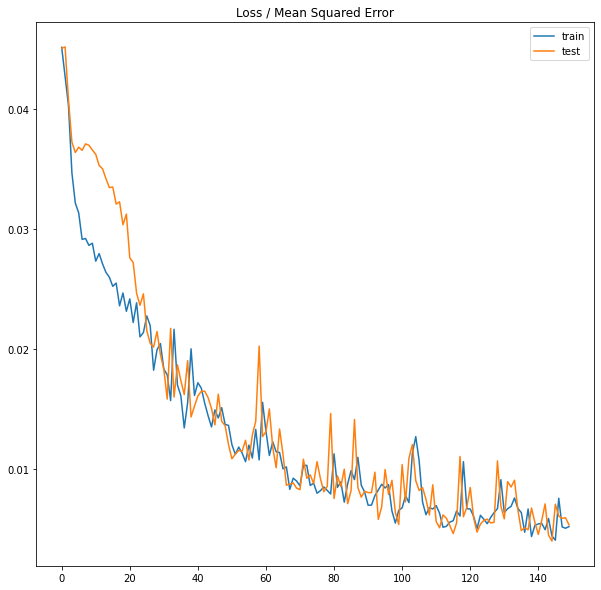

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend()
plt.show()

In [ ]:
# make predictions
trainPredict = regressorGRU.predict(X_train)
testPredict = regressorGRU.predict(X_test)

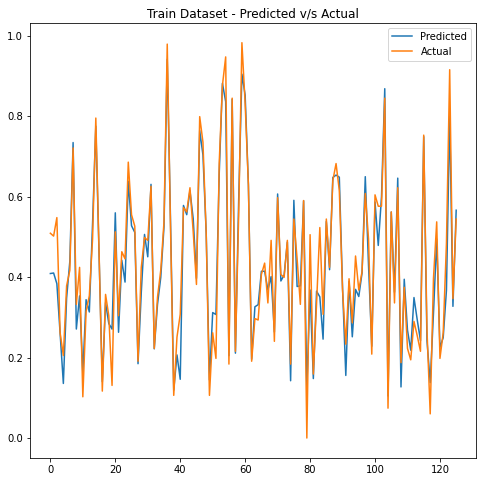

In [ ]:
plt.title('Train Dataset - Predicted v/s Actual')
plt.plot(trainPredict , label='Predicted')
plt.plot(y_train, label='Actual')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend()
plt.show()

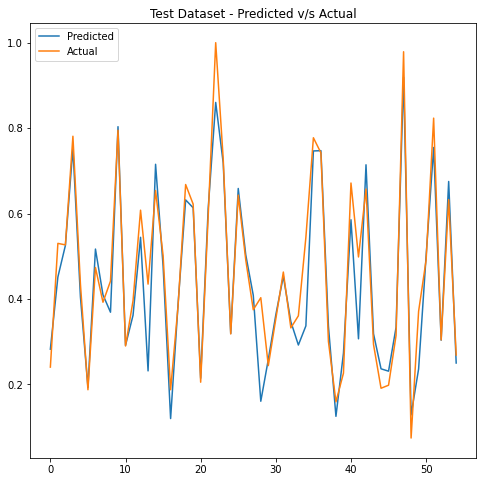

In [ ]:
plt.title('Test Dataset - Predicted v/s Actual')
plt.plot(testPredict , label='Predicted')
plt.plot(y_test, label='Actual')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend()
plt.show()

In [ ]:
#Mean Absolute Error
mae_train = mean_absolute_error(y_train, trainPredict)
mae_test = mean_absolute_error(y_test, testPredict)
print('MAE Train: %.3f'% (mae_train))
print('MAE Test: %.3f'% (mae_test))
#Root Mean Squared Error
rmse_train = mean_squared_error(y_train, trainPredict, squared=False)
rmse_test = mean_squared_error(y_test, testPredict, squared=False)
print('RMSE Train: %.3f'% (rmse_train))
print('RMSE Test: %.3f'% (rmse_test))
#Mean Absolute Percentage Error
mp_train = mean_absolute_percentage_error(trainPredict,y_train)
mp_test = mean_absolute_percentage_error(testPredict,y_test)
print('MAPE Train: %.3f'% (mp_train))
print('MAPE Test: %.3f'% (mp_test))

MAE Train: 0.039
MAE Test: 0.048
RMSE Train: 0.054
RMSE Test: 0.073
MAPE Train: 0.715
MAPE Test: 0.716
